# Red Wine Quality

The goal is to predict quality of the wine (red or white).
It can be classification or regression. Here we go with regression, try to predict the quality score.

### Data set information:
The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. 
The data set is publicly available.
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

### Data set description:

Input variables (based on physicochemical tests):
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol

Output variable (based on sensory data):
12. quality (score between 0 and 10)

### ML models:
1. Linear Regression
2. Polynomial Regression
3. Decision Tree Regression
4. Random Forest Regression
5. XGBoost
6. CatBoost

## Import Libraries and Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import cross_val_score
sns.set()
%matplotlib inline

In [2]:
!pip install catboost

In [3]:
red_wine = pd.read_csv('winequality-red.csv', delimiter=";")
white_wine = pd.read_csv('winequality-white.csv', delimiter=";")

## Exploratory Data Analysis

In [4]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [9]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Since there are some big differences in properties between white and red wine (residual sugar, free sulfur dioxide, total sulfure dioxide) I'll not concatenate the data set, otherwise large outliers would occur.
Therefore, for the sake of clarity and simplicity, I'll separate red and white wines into separate Python notebooks and this will be red wine notebook.

In [10]:
dataset = red_wine.copy()

In [11]:
dataset.duplicated().sum()

240

It is unknown whether these are actual duplicates or more wines have the same properties and given that it is 15%, I'll not drop them, for now.

In [12]:
dataset.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [13]:
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine color']

### Numerical Columns

In [14]:
# Function for drawing numerical columns. Need to pass dimension (size_x and size_y), column name, and title.
def numerical_columns_histplot(size_x, size_y, column, title):
    fig, ax = plt.subplots()
    fig.set_size_inches(size_x, size_y)
    
    ax.hist(dataset[column])
    ax.set_xlabel("", fontsize = 15)
    ax.set_ylabel("", fontsize = 15)
    ax.set_title(title, fontsize = 15)
    ax.tick_params(labelsize = 15)

    sns.despine()

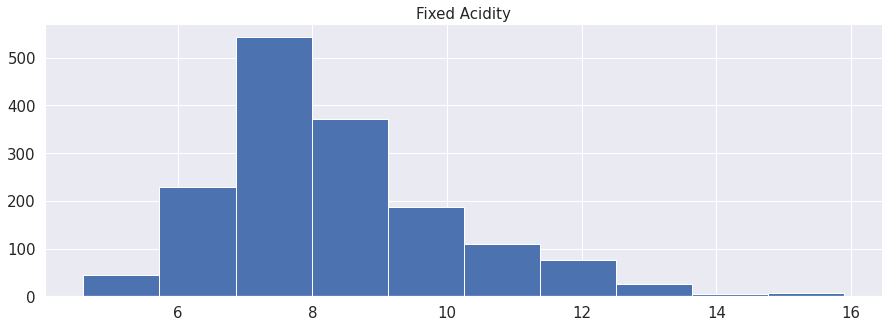

In [15]:
numerical_columns_histplot(15, 5, columns[0], "Fixed Acidity")

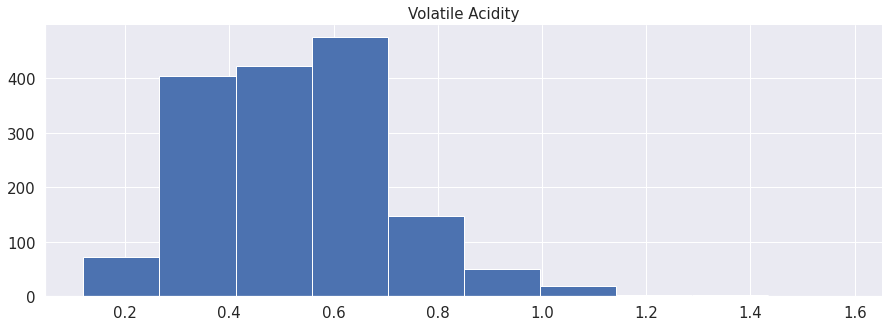

In [16]:
numerical_columns_histplot(15, 5, columns[1], "Volatile Acidity")

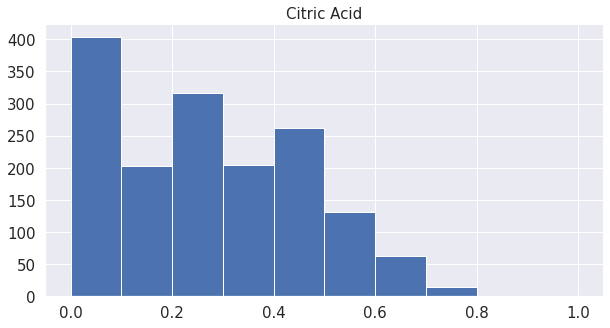

In [17]:
numerical_columns_histplot(10, 5, columns[2], "Citric Acid")

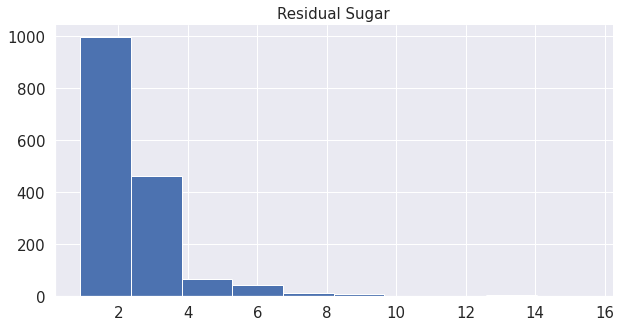

In [18]:
numerical_columns_histplot(10, 5, columns[3], "Residual Sugar")

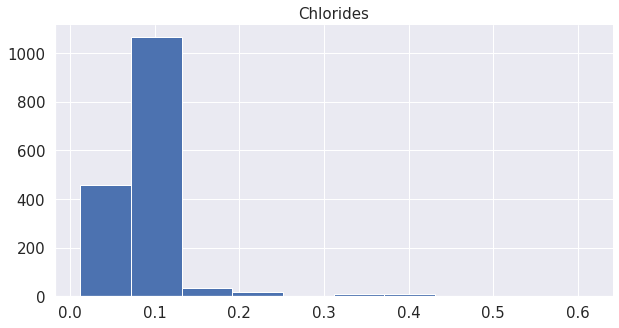

In [19]:
numerical_columns_histplot(10, 5, columns[4], "Chlorides")

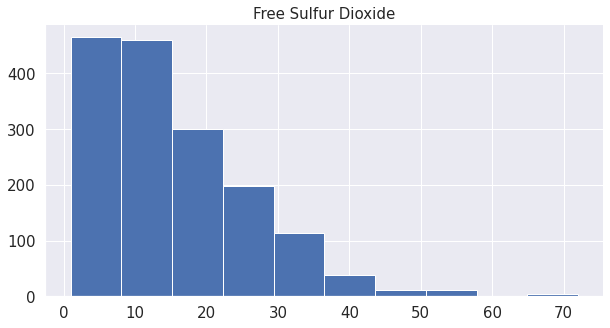

In [20]:
numerical_columns_histplot(10, 5, columns[5], "Free Sulfur Dioxide")

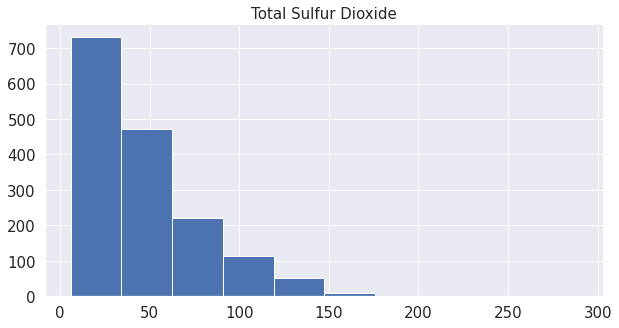

In [21]:
numerical_columns_histplot(10, 5, columns[6], "Total Sulfur Dioxide")

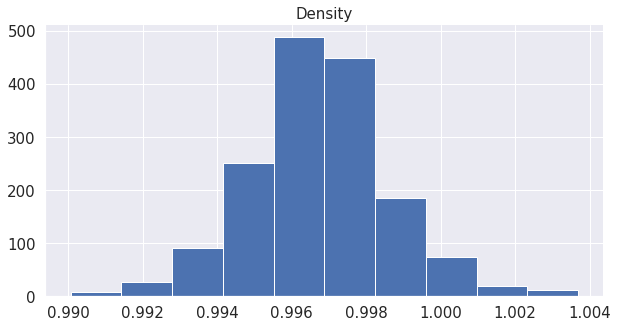

In [22]:
numerical_columns_histplot(10, 5, columns[7], "Density")

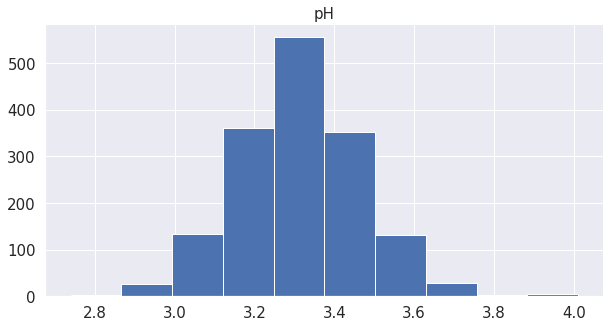

In [23]:
numerical_columns_histplot(10, 5, columns[8], "pH")

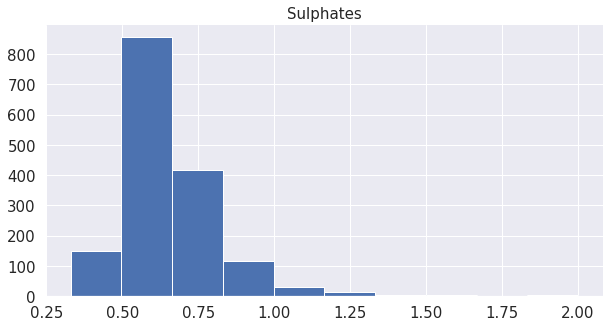

In [24]:
numerical_columns_histplot(10, 5, columns[9], "Sulphates")

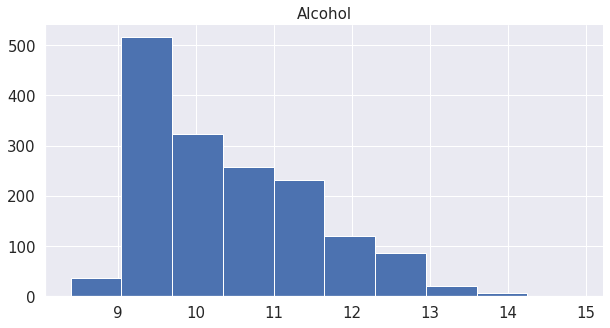

In [25]:
numerical_columns_histplot(10, 5, columns[10], "Alcohol")

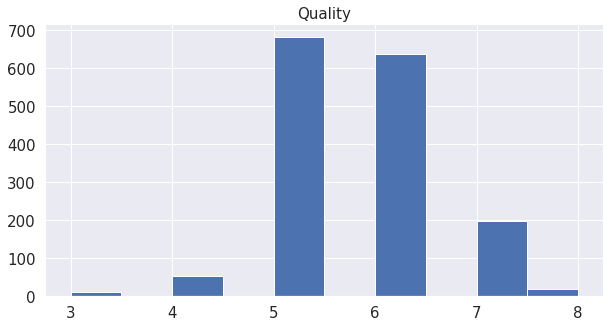

In [26]:
numerical_columns_histplot(10, 5, columns[11], "Quality")

### Comparing the Dependent variable with Independent variables

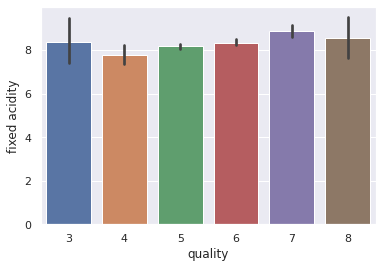

In [27]:
sns.barplot(x = "quality", y = columns[0], data = dataset)

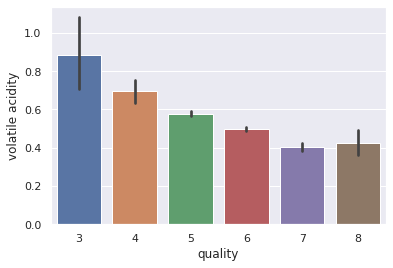

In [28]:
sns.barplot(x = "quality", y = columns[1], data = dataset)

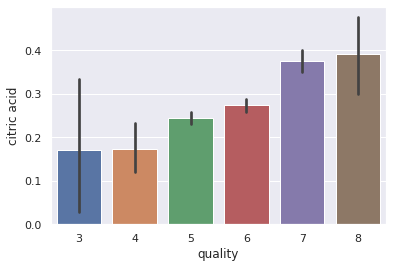

In [29]:
sns.barplot(x = "quality", y = columns[2], data = dataset)

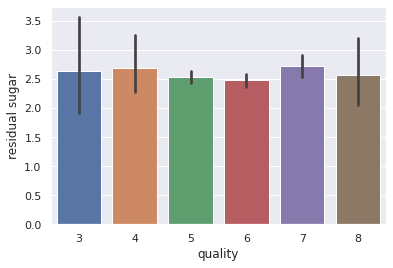

In [30]:
sns.barplot(x = "quality", y = columns[3], data = dataset)

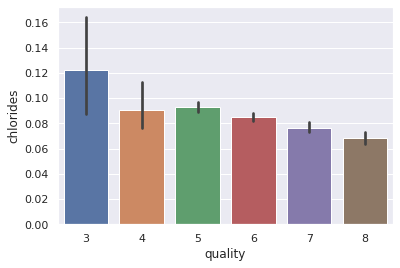

In [31]:
sns.barplot(x = "quality", y = columns[4], data = dataset)

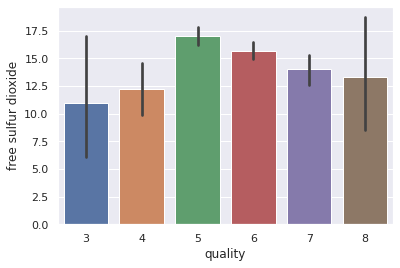

In [32]:
sns.barplot(x = "quality", y = columns[5], data = dataset)

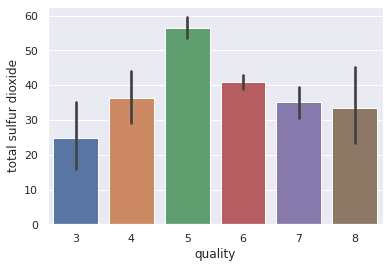

In [33]:
sns.barplot(x = "quality", y = columns[6], data = dataset)

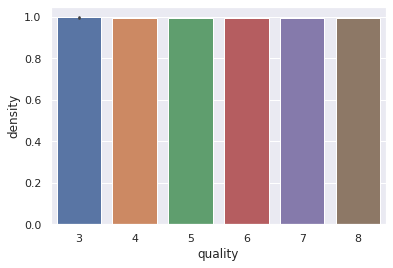

In [34]:
sns.barplot(x = "quality", y = columns[7], data = dataset)

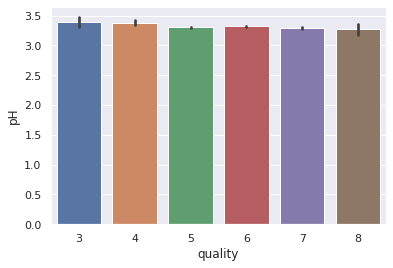

In [35]:
sns.barplot(x = "quality", y = columns[8], data = dataset)

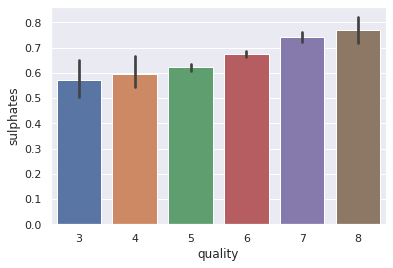

In [36]:
sns.barplot(x = "quality", y = columns[9], data = dataset)

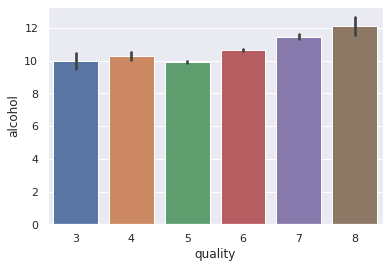

In [37]:
sns.barplot(x = "quality", y = columns[10], data = dataset)

I'm not dropping any outliers at the moment because I believe the data is accurate and relevant to the model.

### Searching for Outliers

In [38]:
def iqr_outliers(dataset):
    outliers = []
    
    for i in dataset:
        first_quartile = dataset.quantile(0.25)
        third_quartile = dataset.quantile(0.75)

        iqr = third_quartile - first_quartile
        lower_whisker = first_quartile - 1.5 * iqr
        uppwer_whisker = third_quartile + 1.5 * iqr
        
        if i > uppwer_whisker or i < lower_whisker:
            outliers.append(i)
        outliers.sort()
    
    print(f"Outliers: {len(outliers)} => {outliers}")

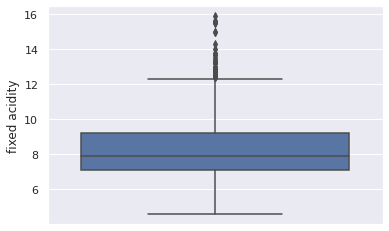

In [39]:
sns.boxplot(y=columns[0], data=dataset)

In [40]:
iqr_outliers(dataset[columns[0]])

Outliers: 49 => [12.4, 12.4, 12.4, 12.4, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.6, 12.6, 12.6, 12.6, 12.7, 12.7, 12.7, 12.7, 12.8, 12.8, 12.8, 12.8, 12.8, 12.9, 12.9, 13.0, 13.0, 13.0, 13.2, 13.2, 13.2, 13.3, 13.3, 13.3, 13.4, 13.5, 13.7, 13.7, 13.8, 14.0, 14.3, 15.0, 15.0, 15.5, 15.5, 15.6, 15.6, 15.9]


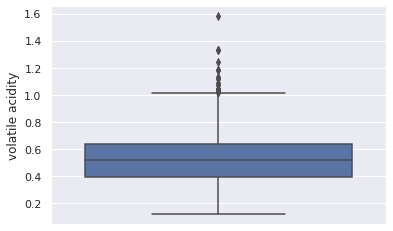

In [41]:
sns.boxplot(y=columns[1], data=dataset)

In [42]:
iqr_outliers(dataset[columns[1]])

Outliers: 19 => [1.02, 1.02, 1.02, 1.02, 1.025, 1.035, 1.04, 1.04, 1.04, 1.07, 1.09, 1.115, 1.13, 1.18, 1.185, 1.24, 1.33, 1.33, 1.58]


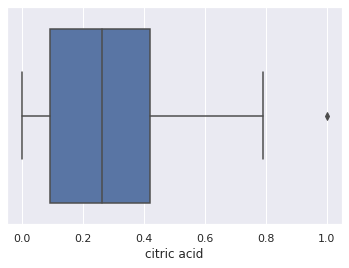

In [43]:
sns.boxplot(x=columns[2], data=dataset)

In [44]:
iqr_outliers(dataset[columns[2]])

Outliers: 1 => [1.0]


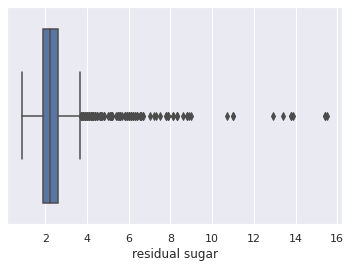

In [45]:
sns.boxplot(x=columns[3], data=dataset)

In [46]:
iqr_outliers(dataset[columns[3]])

Outliers: 155 => [3.7, 3.7, 3.7, 3.7, 3.75, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.9, 3.9, 3.9, 3.9, 3.9, 3.9, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.1, 4.1, 4.1, 4.1, 4.1, 4.1, 4.2, 4.2, 4.2, 4.2, 4.2, 4.25, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.3, 4.4, 4.4, 4.4, 4.4, 4.5, 4.5, 4.5, 4.5, 4.6, 4.6, 4.6, 4.6, 4.6, 4.6, 4.65, 4.65, 4.7, 4.8, 4.8, 4.8, 5.0, 5.1, 5.1, 5.1, 5.1, 5.1, 5.15, 5.2, 5.2, 5.2, 5.4, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.6, 5.6, 5.6, 5.6, 5.6, 5.6, 5.7, 5.8, 5.8, 5.8, 5.8, 5.9, 5.9, 5.9, 6.0, 6.0, 6.0, 6.0, 6.1, 6.1, 6.1, 6.1, 6.2, 6.2, 6.2, 6.3, 6.3, 6.4, 6.4, 6.4, 6.55, 6.55, 6.6, 6.6, 6.7, 6.7, 7.0, 7.2, 7.3, 7.5, 7.8, 7.8, 7.9, 7.9, 7.9, 8.1, 8.1, 8.3, 8.3, 8.3, 8.6, 8.8, 8.8, 8.9, 9.0, 10.7, 11.0, 11.0, 12.9, 13.4, 13.8, 13.8, 13.9, 15.4, 15.4, 15.5]


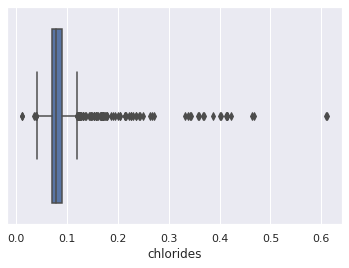

In [47]:
sns.boxplot(x=columns[4], data=dataset)

In [48]:
iqr_outliers(dataset[columns[4]])

Outliers: 112 => [0.012, 0.012, 0.034, 0.038, 0.038, 0.039, 0.039, 0.039, 0.039, 0.12, 0.12, 0.12, 0.121, 0.121, 0.122, 0.122, 0.122, 0.122, 0.122, 0.122, 0.122, 0.12300000000000001, 0.12300000000000001, 0.12300000000000001, 0.12300000000000001, 0.12300000000000001, 0.12300000000000001, 0.124, 0.124, 0.124, 0.125, 0.126, 0.127, 0.128, 0.132, 0.132, 0.132, 0.132, 0.136, 0.13699999999999998, 0.14300000000000002, 0.145, 0.146, 0.147, 0.14800000000000002, 0.152, 0.152, 0.153, 0.157, 0.157, 0.157, 0.159, 0.161, 0.165, 0.166, 0.166, 0.166, 0.168, 0.16899999999999998, 0.17, 0.171, 0.171, 0.172, 0.174, 0.17600000000000002, 0.17800000000000002, 0.17800000000000002, 0.18600000000000003, 0.19, 0.19399999999999998, 0.2, 0.205, 0.205, 0.213, 0.214, 0.214, 0.214, 0.21600000000000003, 0.222, 0.226, 0.226, 0.23, 0.235, 0.23600000000000002, 0.24100000000000002, 0.243, 0.25, 0.263, 0.267, 0.27, 0.332, 0.337, 0.341, 0.34299999999999997, 0.358, 0.36, 0.368, 0.369, 0.387, 0.401, 0.40299999999999997, 0.413,

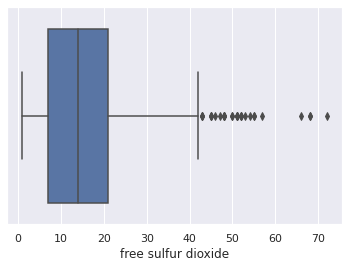

In [49]:
sns.boxplot(x=columns[5], data=dataset)

In [50]:
iqr_outliers(dataset[columns[5]])

Outliers: 30 => [43.0, 43.0, 43.0, 45.0, 45.0, 45.0, 46.0, 47.0, 48.0, 48.0, 48.0, 48.0, 50.0, 50.0, 51.0, 51.0, 51.0, 51.0, 52.0, 52.0, 52.0, 53.0, 54.0, 55.0, 55.0, 57.0, 66.0, 68.0, 68.0, 72.0]


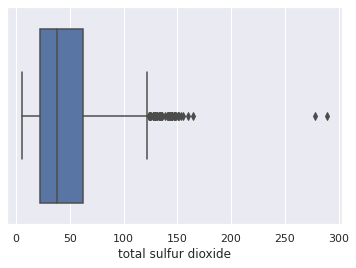

In [51]:
sns.boxplot(x=columns[6], data=dataset)

In [52]:
iqr_outliers(dataset[columns[6]])

Outliers: 55 => [124.0, 124.0, 124.0, 125.0, 125.0, 126.0, 127.0, 127.0, 128.0, 128.0, 129.0, 129.0, 129.0, 130.0, 131.0, 131.0, 131.0, 133.0, 133.0, 133.0, 134.0, 134.0, 135.0, 135.0, 136.0, 136.0, 139.0, 140.0, 141.0, 141.0, 141.0, 142.0, 143.0, 143.0, 144.0, 144.0, 144.0, 145.0, 145.0, 145.0, 147.0, 147.0, 147.0, 148.0, 148.0, 149.0, 151.0, 151.0, 152.0, 153.0, 155.0, 160.0, 165.0, 278.0, 289.0]


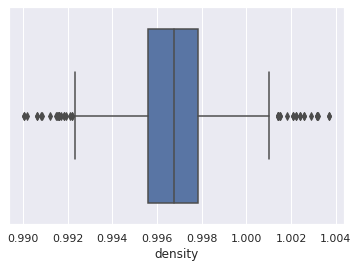

In [53]:
sns.boxplot(x=columns[7], data=dataset)

In [54]:
iqr_outliers(dataset[columns[7]])

Outliers: 45 => [0.9900700000000001, 0.9900700000000001, 0.9902, 0.99064, 0.99064, 0.9908, 0.9908399999999999, 0.9912, 0.9915, 0.99154, 0.9915700000000001, 0.9916, 0.9916, 0.9916200000000001, 0.9917, 0.99182, 0.99182, 0.9919100000000001, 0.9921, 0.9922, 0.9922, 1.0014, 1.0014, 1.0014, 1.0014, 1.0014, 1.0014, 1.0015, 1.0015, 1.0018, 1.0021, 1.0021, 1.0022, 1.0022, 1.00242, 1.00242, 1.0026, 1.0026, 1.00289, 1.00315, 1.00315, 1.00315, 1.0032, 1.00369, 1.00369]


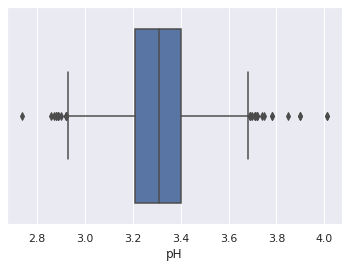

In [55]:
sns.boxplot(x=columns[8], data=dataset)

In [56]:
iqr_outliers(dataset[columns[8]])

Outliers: 35 => [2.74, 2.86, 2.87, 2.88, 2.88, 2.89, 2.89, 2.89, 2.89, 2.9, 2.92, 2.92, 2.92, 2.92, 3.69, 3.69, 3.69, 3.69, 3.7, 3.71, 3.71, 3.71, 3.71, 3.72, 3.72, 3.72, 3.74, 3.75, 3.78, 3.78, 3.85, 3.9, 3.9, 4.01, 4.01]


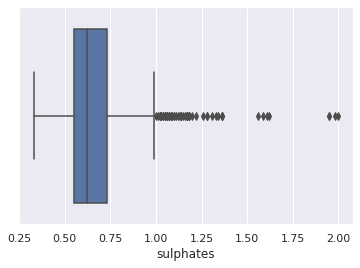

In [57]:
sns.boxplot(x=columns[9], data=dataset)

In [58]:
iqr_outliers(dataset[columns[9]])

Outliers: 59 => [1.0, 1.01, 1.02, 1.02, 1.02, 1.03, 1.03, 1.04, 1.04, 1.05, 1.05, 1.05, 1.06, 1.06, 1.06, 1.06, 1.07, 1.07, 1.08, 1.08, 1.08, 1.09, 1.1, 1.1, 1.11, 1.12, 1.13, 1.13, 1.14, 1.14, 1.15, 1.16, 1.17, 1.17, 1.17, 1.17, 1.17, 1.18, 1.18, 1.18, 1.2, 1.22, 1.26, 1.28, 1.28, 1.31, 1.33, 1.34, 1.36, 1.36, 1.36, 1.56, 1.59, 1.61, 1.62, 1.95, 1.95, 1.98, 2.0]


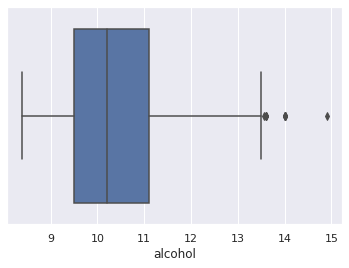

In [59]:
sns.boxplot(x=columns[10], data=dataset)

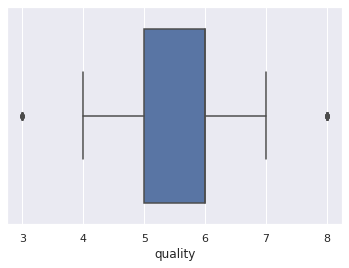

In [60]:
sns.boxplot(x=columns[11], data=dataset)

In [61]:
iqr_outliers(dataset[columns[10]])

Outliers: 13 => [13.566666666666698, 13.6, 13.6, 13.6, 13.6, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.9]


## Correlation Matrix

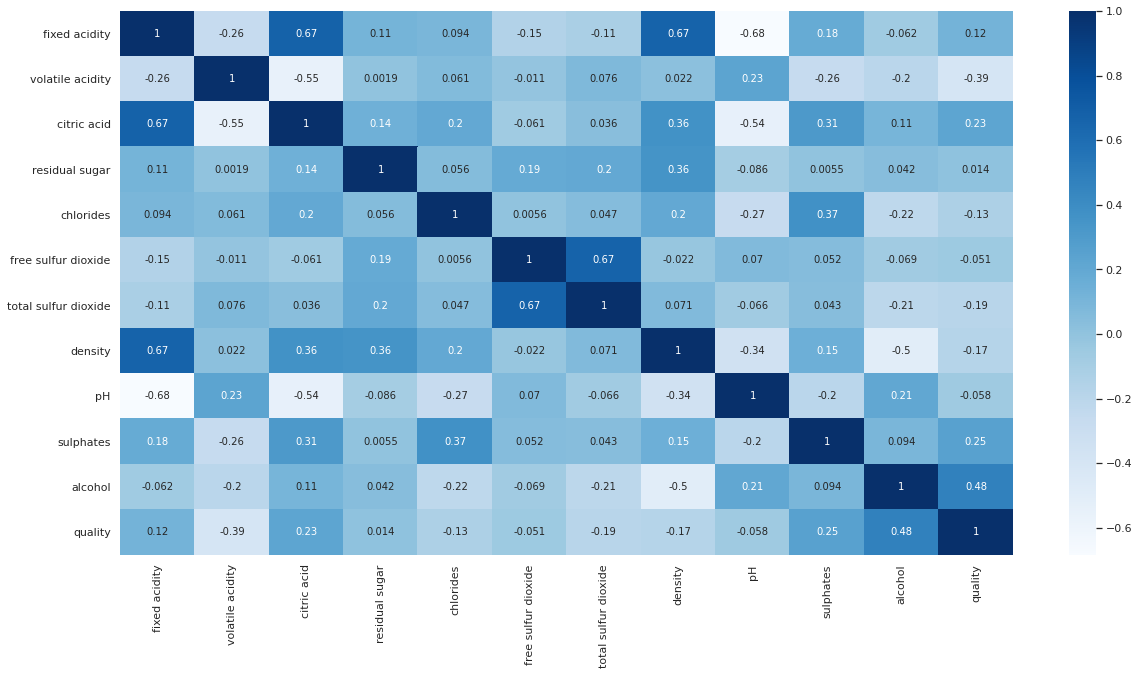

In [62]:
fig = plt.figure(figsize = (20,10))
sns.heatmap(dataset.corr(), cmap='Blues', annot = True)

## Preparation for Training and Testing

Dropping: residual sugar, free sulfur dioxide, pH

In [63]:
cleaned_dataset = dataset.copy()
cleaned_dataset = cleaned_dataset[['fixed acidity', 'volatile acidity', 'citric acid', 
       'chlorides', 'total sulfur dioxide', 'density',
       'sulphates', 'alcohol']]

#### Defining dependent and independent variables

In [64]:
X = cleaned_dataset.iloc[:, :-1].values
y = cleaned_dataset.iloc[:, -1].values

#### Splitting the dataset into the Training and Test set

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#### Feature Scaling

In [66]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Models

### 1. Linear Regression

In [67]:
from sklearn.linear_model import LinearRegression
lin_regressor = LinearRegression()
lin_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
y_pred = lin_regressor.predict(X_test)

In [69]:
lin_score = r2_score(y_test, y_pred)
lin_score = "{:.2f} %".format(lin_score*100)

In [70]:
accuracies = cross_val_score(estimator = lin_regressor, X = X_train, y = y_train, cv = 10)
val_accuracy_score_lin_reg = "{:.2f} %".format(accuracies.mean()*100)

In [71]:
results_df = pd.DataFrame(data=[["Linear Regression", val_accuracy_score_lin_reg, lin_score]], 
                          columns=['Model', 'Validation Accuracy', 'R2 Score'])
results_df

,Model,Validation Accuracy,R2 Score
0,Linear Regression,41.42 %,48.71 %


### 2. Polynomial Regression

In [72]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
pol_regressor = LinearRegression()
pol_regressor.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
y_pred = pol_regressor.predict(poly_reg.transform(X_test))

In [74]:
pol_score = r2_score(y_test, y_pred)
pol_score = "{:.2f} %".format(pol_score*100)

In [75]:
accuracies = cross_val_score(estimator = pol_regressor, X = X_train, y = y_train, cv = 10)
val_accuracy_score_pol_reg = "{:.2f} %".format(accuracies.mean()*100)

In [76]:
results_df_2 = pd.DataFrame(data=[["Polynomial Regression", val_accuracy_score_pol_reg, pol_score]], 
                          columns=['Model', 'Validation Accuracy', 'R2 Score'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Validation Accuracy,R2 Score
0,Linear Regression,41.42 %,48.71 %
1,Polynomial Regression,41.42 %,-241.47 %


### 3. Decision Tree Regression

In [77]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_regressor = DecisionTreeRegressor(random_state = 0)
decision_tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [78]:
y_pred = decision_tree_regressor.predict(X_test)

In [79]:
decision_tree_score = r2_score(y_test, y_pred)
decision_tree_score = "{:.2f} %".format(decision_tree_score*100)

In [80]:
accuracies = cross_val_score(estimator = decision_tree_regressor, X = X_train, y = y_train, cv = 10)
val_accuracy_score_decision_tree = "{:.2f} %".format(accuracies.mean()*100)

In [81]:
results_df_3 = pd.DataFrame(data=[["Decision Tree Regression", val_accuracy_score_decision_tree, decision_tree_score]], 
                          columns=['Model', 'Validation Accuracy', 'R2 Score'])
results_df = results_df.append(results_df_3, ignore_index=True)
results_df

,Model,Validation Accuracy,R2 Score
0,Linear Regression,41.42 %,48.71 %
1,Polynomial Regression,41.42 %,-241.47 %
2,Decision Tree Regression,35.54 %,35.02 %


### 4. Random Forest Regression

In [82]:
from sklearn.ensemble import RandomForestRegressor
random_forest_regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
random_forest_regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [83]:
y_pred = random_forest_regressor.predict(X_test)

In [84]:
random_forest_score = r2_score(y_test, y_pred)
random_forest_score = "{:.2f} %".format(random_forest_score*100)

In [85]:
accuracies = cross_val_score(estimator = random_forest_regressor, X = X_train, y = y_train, cv = 10)
val_accuracy_score_random_forest = "{:.2f} %".format(accuracies.mean()*100)

In [86]:
results_df_4 = pd.DataFrame(data=[["Random Forest Regression", val_accuracy_score_random_forest, random_forest_score]], 
                          columns=['Model', 'Validation Accuracy', 'R2 Score'])
results_df = results_df.append(results_df_4, ignore_index=True)
results_df

,Model,Validation Accuracy,R2 Score
0,Linear Regression,41.42 %,48.71 %
1,Polynomial Regression,41.42 %,-241.47 %
2,Decision Tree Regression,35.54 %,35.02 %
3,Random Forest Regression,61.50 %,66.37 %


### 5. XGBoost

In [87]:
from xgboost import XGBRegressor
xgb_regressor = XGBRegressor(objective ='reg:squarederror')
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [88]:
y_pred = xgb_regressor.predict(X_test)

In [89]:
xgb_score = r2_score(y_test, y_pred)
xgb_score = "{:.2f} %".format(xgb_score*100)

In [90]:
accuracies = cross_val_score(estimator = xgb_regressor, X = X_train, y = y_train, cv = 10)
val_accuracy_score_xgb = "{:.2f} %".format(accuracies.mean()*100)

In [91]:
results_df_5 = pd.DataFrame(data=[["XGBoost", val_accuracy_score_xgb, xgb_score]], 
                          columns=['Model', 'Validation Accuracy', 'R2 Score'])
results_df = results_df.append(results_df_5, ignore_index=True)
results_df

,Model,Validation Accuracy,R2 Score
0,Linear Regression,41.42 %,48.71 %
1,Polynomial Regression,41.42 %,-241.47 %
2,Decision Tree Regression,35.54 %,35.02 %
3,Random Forest Regression,61.50 %,66.37 %
4,XGBoost,59.89 %,65.51 %


### 6. CatBoost

In [93]:
from catboost import CatBoostRegressor
cat_regressor = CatBoostRegressor()
cat_regressor.fit(X_train, y_train)

Learning rate set to 0.040312
0:	learn: 1.0494196	total: 47.9ms	remaining: 47.8s
1:	learn: 1.0343379	total: 49.3ms	remaining: 24.6s
2:	learn: 1.0186462	total: 50.9ms	remaining: 16.9s
3:	learn: 1.0057458	total: 52.2ms	remaining: 13s
4:	learn: 0.9898108	total: 53.5ms	remaining: 10.6s
5:	learn: 0.9750587	total: 54.8ms	remaining: 9.07s
6:	learn: 0.9621185	total: 56ms	remaining: 7.95s
7:	learn: 0.9479010	total: 57.5ms	remaining: 7.13s
8:	learn: 0.9353379	total: 58.8ms	remaining: 6.47s
9:	learn: 0.9228538	total: 60.1ms	remaining: 5.95s
10:	learn: 0.9115819	total: 61.4ms	remaining: 5.52s
11:	learn: 0.9016824	total: 62.8ms	remaining: 5.17s
12:	learn: 0.8920832	total: 64.1ms	remaining: 4.86s
13:	learn: 0.8836365	total: 65.5ms	remaining: 4.61s
14:	learn: 0.8743256	total: 66.9ms	remaining: 4.39s
15:	learn: 0.8651099	total: 68.3ms	remaining: 4.2s
16:	learn: 0.8567396	total: 69.7ms	remaining: 4.03s
17:	learn: 0.8484023	total: 71.2ms	remaining: 3.89s
18:	learn: 0.8402482	total: 72.6ms	remaining: 3.7

In [94]:
y_pred = cat_regressor.predict(X_test)

In [95]:
cat_score = r2_score(y_test, y_pred)
cat_score = "{:.2f} %".format(cat_score*100)

In [96]:
accuracies = cross_val_score(estimator = cat_regressor, X = X_train, y = y_train, cv = 10)
val_accuracy_score_cat = "{:.2f} %".format(accuracies.mean()*100)

Streaming output truncated to the last 5000 lines.
4:	learn: 1.0052581	total: 7.83ms	remaining: 1.56s
5:	learn: 0.9905133	total: 9.12ms	remaining: 1.51s
6:	learn: 0.9791255	total: 10.6ms	remaining: 1.5s
7:	learn: 0.9649447	total: 11.9ms	remaining: 1.48s
8:	learn: 0.9518214	total: 13.3ms	remaining: 1.46s
9:	learn: 0.9390371	total: 14.5ms	remaining: 1.44s
10:	learn: 0.9279357	total: 17.9ms	remaining: 1.61s
11:	learn: 0.9170766	total: 19.5ms	remaining: 1.6s
12:	learn: 0.9085676	total: 20.8ms	remaining: 1.58s
13:	learn: 0.8998317	total: 22.2ms	remaining: 1.56s
14:	learn: 0.8890517	total: 23.6ms	remaining: 1.55s
15:	learn: 0.8798006	total: 24.9ms	remaining: 1.53s
16:	learn: 0.8700098	total: 26.4ms	remaining: 1.52s
17:	learn: 0.8616155	total: 27.7ms	remaining: 1.51s
18:	learn: 0.8534523	total: 29ms	remaining: 1.5s
19:	learn: 0.8457565	total: 30.4ms	remaining: 1.49s
20:	learn: 0.8387305	total: 31.8ms	remaining: 1.48s
21:	learn: 0.8316230	total: 33.1ms	remaining: 1.47s
22:	learn: 0.8247026	tot

In [97]:
results_df_5 = pd.DataFrame(data=[["CatBoost", val_accuracy_score_cat, cat_score]], 
                          columns=['Model', 'Validation Accuracy', 'R2 Score'])
results_df = results_df.append(results_df_5, ignore_index=True)
results_df

,Model,Validation Accuracy,R2 Score
0,Linear Regression,41.42 %,48.71 %
1,Polynomial Regression,41.42 %,-241.47 %
2,Decision Tree Regression,35.54 %,35.02 %
3,Random Forest Regression,61.50 %,66.37 %
4,XGBoost,59.89 %,65.51 %
5,CatBoost,65.88 %,69.96 %


## XGBoost - Hyperparameter Tuning

In [111]:
from sklearn.model_selection import GridSearchCV

def hyperparameter_tuning(X_train, y_train):
    parameters = {
        'colsample_bytree': [0.5, 0.7, 1],
        'gamma': [0, 1, 9],
        'learning_rate': [0.01, 0.1],
        'max_depth': [1, 3, 5, 7, 18],
        'min_child_weight': [0, 1, 3, 5, 10],
        'n_estimators' : [100, 150, 180],
        'objective': ['reg:squarederror'], 
        'reg_alpha': [1, 40, 100, 180],
        'reg_lambda': [0, 1]
    }

    xgb_regressor = XGBRegressor()

    grid_search = GridSearchCV(estimator = xgb_regressor,
                           param_grid = parameters,                        
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    grid_search.fit(X_train, y_train)

    return grid_search.best_params_

In [112]:
hyperparameter_tuning(X_train, y_train)

Fitting 5 folds for each of 10800 candidates, totalling 54000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 722 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done 1722 tasks      | elapsed:   53.7s
[Parallel(n_jobs=-1)]: Done 3122 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 4922 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 7122 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 9722 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 12722 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 16122 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 19922 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done 24122 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-1)]: Done 28722 tasks      | elapsed: 19.5min
[Parallel(n_jobs=-1)]: Done 33112 tasks      | elapsed: 23.0min
[Parallel(n_jobs=-1)]: Done 37886 tasks      | elapsed: 27.1min
[Parallel(n_jobs=-1)]: Done 42938 tas

{'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 18,
 'min_child_weight': 3,
 'n_estimators': 100,
 'objective': 'reg:squarederror',
 'reg_alpha': 1,
 'reg_lambda': 1}

In [116]:
xgb_regressor = XGBRegressor(colsample_bytree = 1,
                              gamma = 0,
                              learning_rate = 0.1,
                              max_depth = 18,
                              min_child_weight = 3,
                              n_estimators = 100,
                              objective = 'reg:squarederror',
                              reg_alpha = 1,
                              reg_lambda = 1)
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=18, min_child_weight=3, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=1, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [117]:
y_pred = xgb_regressor.predict(X_test)

In [118]:
xgb_score_tuned = r2_score(y_test, y_pred)
xgb_score_tuned = "{:.2f} %".format(xgb_score_tuned*100)

In [120]:
accuracies = cross_val_score(estimator = xgb_regressor, X = X_train, y = y_train, cv = 10)
val_accuracy_score_xgb_tunded = "{:.2f} %".format(accuracies.mean()*100)

In [121]:
results_df_6 = pd.DataFrame(data=[["XGBoost Tuned", val_accuracy_score_xgb_tunded, xgb_score_tuned]], 
                          columns=['Model', 'Validation Accuracy', 'R2 Score'])
results_df = results_df.append(results_df_6, ignore_index=True)
results_df

,Model,Validation Accuracy,R2 Score
0,Linear Regression,41.42 %,48.71 %
1,Polynomial Regression,41.42 %,-241.47 %
2,Decision Tree Regression,35.54 %,35.02 %
3,Random Forest Regression,61.50 %,66.37 %
4,XGBoost,59.89 %,65.51 %
5,CatBoost,65.88 %,69.96 %
6,XGBoost Tuned,66.65 %,69.83 %
